In [ ]:
import ctypes  # An included library with Python install.   
response=ctypes.windll.user32.MessageBoxW(0, "Your JioFi router is fully charged ", "Unplug charger", 1)

In [ ]:
import easygui

easygui.msgbox("This is a message!", title="simple gui")

In [ ]:
import urllib.request
try:
    page = urllib.request.urlopen('http://jiofi.html')
except :
    print("jiofi not connected")

In [5]:
import PySimpleGUI as sg


sg.OneLineProgressMeter('My Meter', 26, 100, 'key','Optional message',orientation='h')
    
    


True

<IPython.core.display.Javascript object>


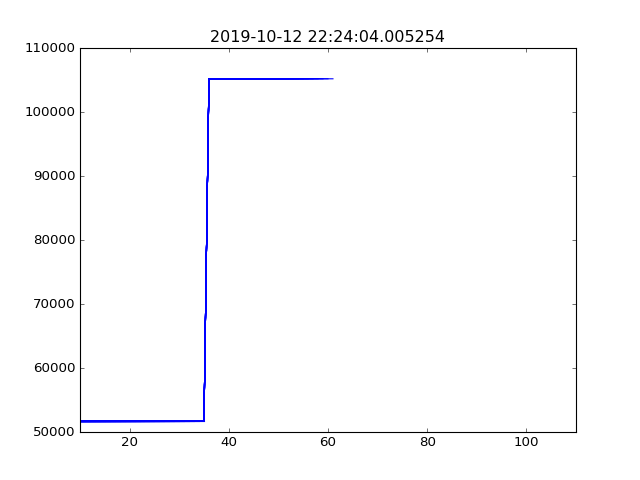

In [ ]:
import time
import psutil
import matplotlib.pyplot as plt
import datetime
import urllib.request
import requests 
from bs4 import BeautifulSoup
import re 

def datarate():
    page = urllib.request.urlopen('http://jiofi.local.html')
    data=page.read()
    soup=BeautifulSoup(data,'html.parser')
    jiofi=soup.find_all('input')
    jiofi=str(jiofi)
    ul=jiofi.find('ulCurrentDataRate')
    dl=jiofi.find('dlCurrentDataRate')
    upload=jiofi[ul:]
    download=jiofi[dl:]
    e_ul=upload.find('>')
    e_dl=download.find('>')
    upload=upload[:e_ul]
    download=download[:e_dl]
    upload=re.findall('\d+',upload)
    download=re.findall('\d+',download)
    return int(upload[0]),int(download[0])



def graph():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.show()
    i = 0
    x, y = [], []
    while True:
        upload,download=datarate()
        x.append(i)
        y.append(download)
        now=datetime.datetime.now()
        ax.plot(x,y,color='b')
        plt.title(now)
        fig.canvas.draw()

        ax.set_xlim(left=max(0, i-50), right=i+50)

        time.sleep(1)
        i += 1
    plt.close()

graph()

(257, 211)